In [1]:
%matplotlib notebook
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly as py
import plotly.graph_objs as go
import ipywidgets as widgets
import seaborn as sns
import colorlover as cl

py.offline.init_notebook_mode(connected=True)

matplotlib data path /home/milicak/anaconda2/lib/python2.7/site-packages/matplotlib/mpl-data
loaded rc file /home/milicak/.config/matplotlib/matplotlibrc
matplotlib version 2.1.2
verbose.level helpful
interactive is False
platform is linux2
$HOME=/home/milicak
CACHEDIR=/home/milicak/.cache/matplotlib
Using fontManager instance from /home/milicak/.cache/matplotlib/fontList.json
backend nbAgg version unknown
backend nbAgg version unknown


In [2]:
fname0 = '../../../../../Analysis/mom/FAMOS_GS/Analysis/data/ITU-MOM/ITU-MOM_GSexps_1980_2009.nc'
ds0 = xr.open_mfdataset(fname0)

fname1 = '../../../../../Analysis/mom/FAMOS_GS/Analysis/data/MITB500/MIT_MITB500_1980_2009.nc'
ds1 = xr.open_mfdataset(fname1)

fname2 = '../../../../../Analysis/mom/FAMOS_GS/Analysis/data/Brest/Brest_GSexps_1980_2009.nc'
ds2 = xr.open_mfdataset(fname2)

fname3 = '../../../../../Analysis/mom/FAMOS_GS/Analysis/data/NorESM/NorESM_GS_experiments_1980_2009.nc'
ds3 = xr.open_mfdataset(fname3)

fname4 = '../../../../../Analysis/mom/FAMOS_GS/Analysis/data/FESOM/FESOM_GS_exps_1980_2009.nc'
ds4 = xr.open_mfdataset(fname4)

In [3]:
dates0 = pd.date_range('1980-01', freq='M', periods=12*29)
ds0['time'] = dates0
ds1['time'] = dates0
ds2['time'] = dates0
ds3['time'] = dates0
ds4['time'] = dates0

In [7]:
""" Plot annual volume vs heat anomaly"""
modelnames = ['ITU' , 'MITB500', 'Brest', 'NorESM', 'FESOM']

ctln = ['ctlfram_volumetotal', 'framvt_c[0]', 'Framrefvolume', 'vt_NorESM_FS_ctrl', 'ctlvoltransp_FS']
gspn = ['gspfram_volumetotal', 'framvt_gsp[0]', 'Framgspvolume', 'vt_NorESM_FS_gsp', 'gspvoltransp_FS']
gsnn = ['gsnfram_volumetotal', 'framvt_gsm[0]', 'Framgsnvolume', 'vt_NorESM_FS_gsn', 'gsnvoltransp_FS']
    
coeffs = [1, 1e-6, 1, 1, 1]

timelen = 29;
time = []
voltr = []
voltrin = []
heattr = []
heattrin = []
seaiceextBS = []
seaiceextNH = []
seaicevolBS = []
seaicevolNH = []
direction = []
models = []
for ind,mdl in enumerate(modelnames):
    dnm = 'ds'+np.str(ind)+'.'+ctln[ind]+'.groupby(\'time.year\').mean().year'
    time = np.append(time,np.copy(eval(dnm)))
    time = np.append(time,np.copy(eval(dnm)))
    dnm = 'ds'+np.str(ind)+'.'+ctln[ind]+'.groupby(\'time.year\').mean()'
    dnm2 = 'ds'+np.str(ind)+'.'+gspn[ind]+'.groupby(\'time.year\').mean()'
    dnm3 = 'ds'+np.str(ind)+'.'+gsnn[ind]+'.groupby(\'time.year\').mean()'
    val1 = (np.copy(eval(dnm2)-eval(dnm))*coeffs[ind])
    val2 = (np.copy(eval(dnm3)-eval(dnm))*coeffs[ind])
    voltr = np.append(voltr,val1)
    direction = np.append(direction,1*np.ones(timelen))    
    voltr = np.append(voltr,val2)
    direction = np.append(direction,-1*np.ones(timelen))
    for ind2 in xrange(2*timelen):
        models.append(mdl)
        

ctln = ['ctlfram_volumeinflow', 'framvt_c[1]', 'Framrefvolume_in', 'inflow_vt_NorESM_FS_ctrl', 'ctlvoltransp_FS_in']
gspn = ['gspfram_volumeinflow', 'framvt_gsp[1]', 'Framgspvolume_in', 'inflow_vt_NorESM_FS_gsp', 'gspvoltransp_FS_in']
gsnn = ['gsnfram_volumeinflow', 'framvt_gsm[1]', 'Framgsnvolume_in', 'inflow_vt_NorESM_FS_gsn', 'gsnvoltransp_FS_in']

coeffs = [1, 1e-6, 1, 1, 1]
for ind,mdl in enumerate(modelnames):
    dnm = 'ds'+np.str(ind)+'.'+ctln[ind]+'.groupby(\'time.year\').mean()'
    dnm2 = 'ds'+np.str(ind)+'.'+gspn[ind]+'.groupby(\'time.year\').mean()'
    dnm3 = 'ds'+np.str(ind)+'.'+gsnn[ind]+'.groupby(\'time.year\').mean()'
    val1 = (np.copy(eval(dnm2)-eval(dnm))*coeffs[ind])
    val2 = (np.copy(eval(dnm3)-eval(dnm))*coeffs[ind])
    voltrin = np.append(voltrin,val1)
    voltrin = np.append(voltrin,val2)
    
        
ctln = ['ctlfram_heattotal', 'framht_c[0]', 'Framrefheat', 'ht_NorESM_FS_ctrl', 'ctlheattransp_FS']
gspn = ['gspfram_heattotal', 'framht_gsp[0]', 'Framgspheat', 'ht_NorESM_FS_gsp', 'gspheattransp_FS']
gsnn = ['gsnfram_heattotal', 'framht_gsm[0]', 'Framgsnheat', 'ht_NorESM_FS_gsn', 'gsnheattransp_FS']
    
coeffs = [1, 1, 1, 1, 1]
for ind,mdl in enumerate(modelnames):
    dnm = 'ds'+np.str(ind)+'.'+ctln[ind]+'.groupby(\'time.year\').mean()'
    dnm2 = 'ds'+np.str(ind)+'.'+gspn[ind]+'.groupby(\'time.year\').mean()'
    dnm3 = 'ds'+np.str(ind)+'.'+gsnn[ind]+'.groupby(\'time.year\').mean()'
    val1 = (np.copy(eval(dnm2)-eval(dnm))*coeffs[ind])
    val2 = (np.copy(eval(dnm3)-eval(dnm))*coeffs[ind])
    heattr = np.append(heattr,val1)
    heattr = np.append(heattr,val2)

    
ctln = ['ctlfram_heatinflow', 'framht_c[1]', 'Framrefheat_in', 'inflow_ht_NorESM_FS_ctrl', 'ctlheattransp_FS_in']
gspn = ['gspfram_heatinflow', 'framht_gsp[1]', 'Framgspheat_in', 'inflow_ht_NorESM_FS_gsp', 'gspheattransp_FS_in']
gsnn = ['gsnfram_heatinflow', 'framht_gsm[1]', 'Framgsnheat_in', 'inflow_ht_NorESM_FS_gsn', 'gsnheattransp_FS_in']
    
coeffs = [1, 1, 1, 1, 1]
for ind,mdl in enumerate(modelnames):
    dnm = 'ds'+np.str(ind)+'.'+ctln[ind]+'.groupby(\'time.year\').mean()'
    dnm2 = 'ds'+np.str(ind)+'.'+gspn[ind]+'.groupby(\'time.year\').mean()'
    dnm3 = 'ds'+np.str(ind)+'.'+gsnn[ind]+'.groupby(\'time.year\').mean()'
    val1 = (np.copy(eval(dnm2)-eval(dnm))*coeffs[ind])
    val2 = (np.copy(eval(dnm3)-eval(dnm))*coeffs[ind])
    heattrin = np.append(heattrin,val1)
    heattrin = np.append(heattrin,val2)
    
    
#    dnm = mdl+varnames[0]
#    print dnm
#    data.update({'time': time})
#    data.update({'volume': val1})
#    data.update({'volume': val2})
    
data = {}   
data.update({'time': time})
data.update({'volume': voltr})
data.update({'volumein': voltrin})
data.update({'heat': heattr})
data.update({'heatin': heattrin})
data.update({'direction': direction})
data.update({'models': models})
data.update({'unit': np.linspace(1,290,num=290)})
    
df = pd.DataFrame(data=data)    
df.to_csv('models_Fram_GSexps.csv')

<IPython.core.display.Javascript object>


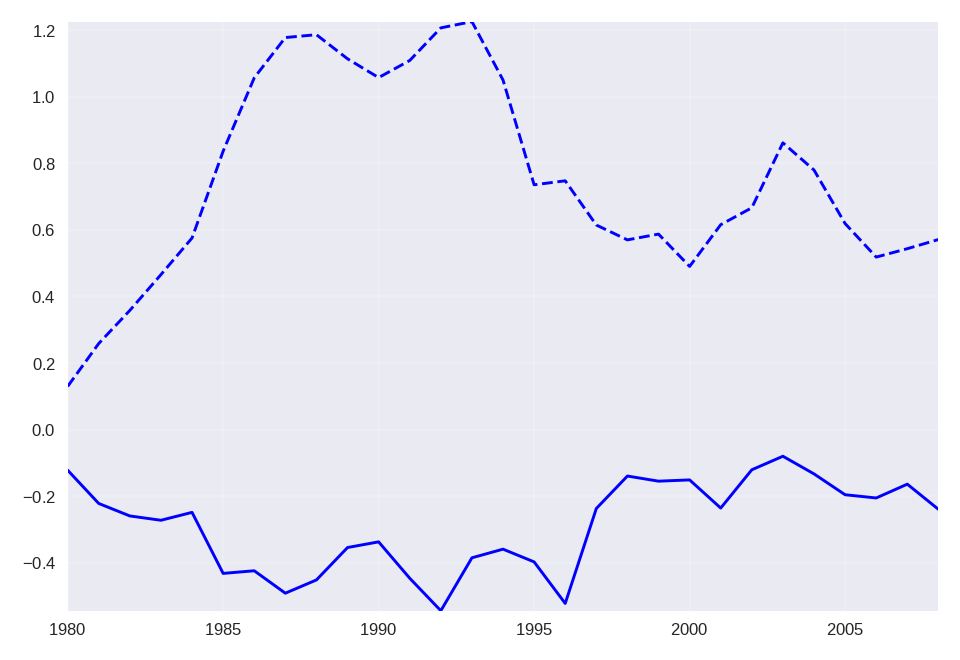

In [6]:
plt.figure()
#plt.plot(df.volume[df['models']=='ITU' and df['direction']==1])
plt.plot(df.time[((df["models"]=='ITU') & (df["direction"]==-1))], 
         df.volume[((df["models"]=='ITU') & (df["direction"]==1))],'b-')
plt.plot(df.time[((df["models"]=='ITU') & (df["direction"]==-1))], 
         df.volume[((df["models"]=='ITU') & (df["direction"]==-1))],'b--')

In [5]:
df

,direction,heat,heatin,models,time,unit,volume,volumein
0,1.0,1.479681,0.775911,ITU,1980.0,1.0,-0.122258,0.468132
1,1.0,2.265360,1.083986,ITU,1981.0,2.0,-0.222352,0.522863
2,1.0,2.970179,1.619278,ITU,1982.0,3.0,-0.259831,0.498679
3,1.0,3.668652,2.204170,ITU,1983.0,4.0,-0.272799,0.452165
4,1.0,3.633148,2.651159,ITU,1984.0,5.0,-0.249073,0.361253
5,1.0,2.210838,0.108090,ITU,1985.0,6.0,-0.432533,0.307067
6,1.0,2.505460,0.423949,ITU,1986.0,7.0,-0.424618,0.174767
7,1.0,2.898308,0.458052,ITU,1987.0,8.0,-0.492048,0.224981
8,1.0,3.842756,2.392546,ITU,1988.0,9.0,-0.452196,0.348378
9,1.0,3.967113,3.299020,ITU,1989.0,10.0,-0.354776,0.388094


In [ ]:
ds4.ctliext